In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline

In [115]:
# loading the training dataset
letters = pd.read_csv('train_1.csv')
letters

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827,1.828
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,14
1,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,0,0,0,1,...,1,1,0,0,0,1,1,1,1,12
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20
4,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,6
1192,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,6
1193,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [116]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Columns: 1025 entries, 1 to 1.828
dtypes: int64(1025)
memory usage: 9.4 MB


In [117]:
# getting the class column
y_train = letters.iloc[:,-1:]
y_train

,1.828
0,14
1,4
2,12
3,20
4,14
...,...
1191,6
1192,6
1193,1
1194,1


<AxesSubplot:ylabel='Count'>

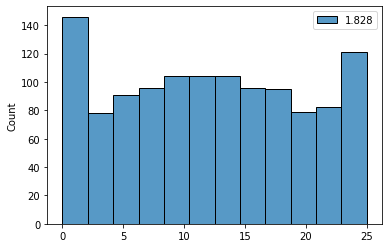

In [118]:
sns.histplot(y_train)

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

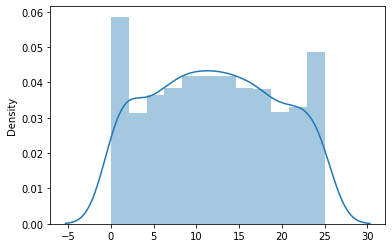

In [119]:
sns.distplot(y_train)

In [87]:
sns.catplot(x = "deck", kind = "count", palette = "ch:.25", data=dist)

ValueError: Could not interpret input 'deck'

In [120]:
x_train = letters.iloc[:,:-1]
x_train

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.818,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1192,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
1193,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [121]:
test = pd.read_csv('test_with_label_1.csv')

In [122]:
x_test = test.iloc[:,:-1]

In [70]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [162]:
y_test = test.iloc[:,-1:]

In [74]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       0.80      1.00      0.89         4
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       0.75      0.75      0.75         4
          10       0.33      0.33      0.33         3
          11       0.80      1.00      0.89         4
          12       0.67      0.67      0.67         3
          13       1.00      0.50      0.67         4
          14       1.00      1.00      1.00         3
          15       0.67      0.67      0.67         3
          16       1.00      1.00      1.00         3
          17       0.75    

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [164]:
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.5, random_state=0)

In [165]:
#gnb = GaussianNB()
#y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(classification_report(y_test,pred_rfc))
#print("Number of mislabeled points out of a total %d points : %d" 
#      % (X_test.shape[0], (y_test != y_pred).sum()))

In [166]:
model = GaussianNB()
model.fit(x_train,y_train)

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [157]:
len(y_train)

1196

In [167]:
results = model.predict(x_test)
results

array([13,  7,  2, 18, 17, 25, 23, 22, 20,  6,  9, 11, 19,  1,  5,  1,  8,
        2, 12, 16,  0, 25, 17, 16,  1, 22,  8, 21, 12,  1, 12, 10, 16, 10,
       17, 16,  1, 15, 12, 16, 11, 13,  1, 13, 17, 12, 14, 24,  0,  0,  3,
       22, 20,  3, 14, 25,  9, 15, 14, 13,  2, 11, 12, 17,  6,  6, 20, 13,
        3, 24, 22, 21,  8, 21, 18,  0, 17, 12, 19], dtype=int64)

In [159]:
len(results)

79

In [168]:
y_test

,4
0,13
1,7
2,2
3,18
4,17
...,...
74,18
75,15
76,17
77,6


In [169]:
model.score(x_test,y_test)

0.6962025316455697